In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Documents\GitHub\diabetes.csv')
print("=== DIABETES DATASET ANALYSIS ===")
print(f"Total patients: {len(df)}")
print(f"Diabetes cases: {df['Outcome'].sum()} ({df['Outcome'].mean()*100:.1f}%)")

=== DIABETES DATASET ANALYSIS ===
Total patients: 768
Diabetes cases: 268 (34.9%)


In [7]:
# Patient profile
print("\n=== PATIENT PROFILE ===")
print(f"Average age: {df['Age'].mean():.1f} years")
print(f"Average glucose: {df['Glucose'].mean():.1f} mg/dL")
print(f"Average BMI: {df['BMI'].mean():.1f}")
print(f"Average blood pressure: {df['BloodPressure'].mean():.1f} mmHg")


=== PATIENT PROFILE ===
Average age: 33.2 years
Average glucose: 120.9 mg/dL
Average BMI: 32.0
Average blood pressure: 69.1 mmHg


In [8]:
# Risk analysis
print("\n=== RISK ANALYSIS ===")
def analyze_risk(feature, threshold, condition='high'):
    risk_group = df[df[feature] > threshold] if condition == 'high' else df[df[feature] < threshold]
    diabetes_rate = risk_group['Outcome'].mean() * 100
    return diabetes_rate

print(f"Diabetes rate when Glucose > 140: {analyze_risk('Glucose', 140):.1f}%")
print(f"Diabetes rate when BMI > 30: {analyze_risk('BMI', 30):.1f}%")
print(f"Diabetes rate when Age > 40: {analyze_risk('Age', 40):.1f}%")



=== RISK ANALYSIS ===
Diabetes rate when Glucose > 140: 68.8%
Diabetes rate when BMI > 30: 46.2%
Diabetes rate when Age > 40: 52.6%


In [9]:
# Feature comparison
print("\n=== FEATURE COMPARISON ===")
diabetic = df[df['Outcome'] == 1]
non_diabetic = df[df['Outcome'] == 0]

print("Average values comparison:")
print(f"{'Feature':<20} {'Diabetic':<10} {'Non-diabetic':<12} {'Difference':<10}")
print("-" * 55)
for feature in ['Glucose', 'BMI', 'Age', 'BloodPressure']:
    diabetic_avg = diabetic[feature].mean()
    non_diabetic_avg = non_diabetic[feature].mean()
    diff = diabetic_avg - non_diabetic_avg
    print(f"{feature:<20} {diabetic_avg:<10.1f} {non_diabetic_avg:<12.1f} {diff:<10.1f}")


=== FEATURE COMPARISON ===
Average values comparison:
Feature              Diabetic   Non-diabetic Difference
-------------------------------------------------------
Glucose              141.3      110.0        31.3      
BMI                  35.1       30.3         4.8       
Age                  37.1       31.2         5.9       
BloodPressure        70.8       68.2         2.6       


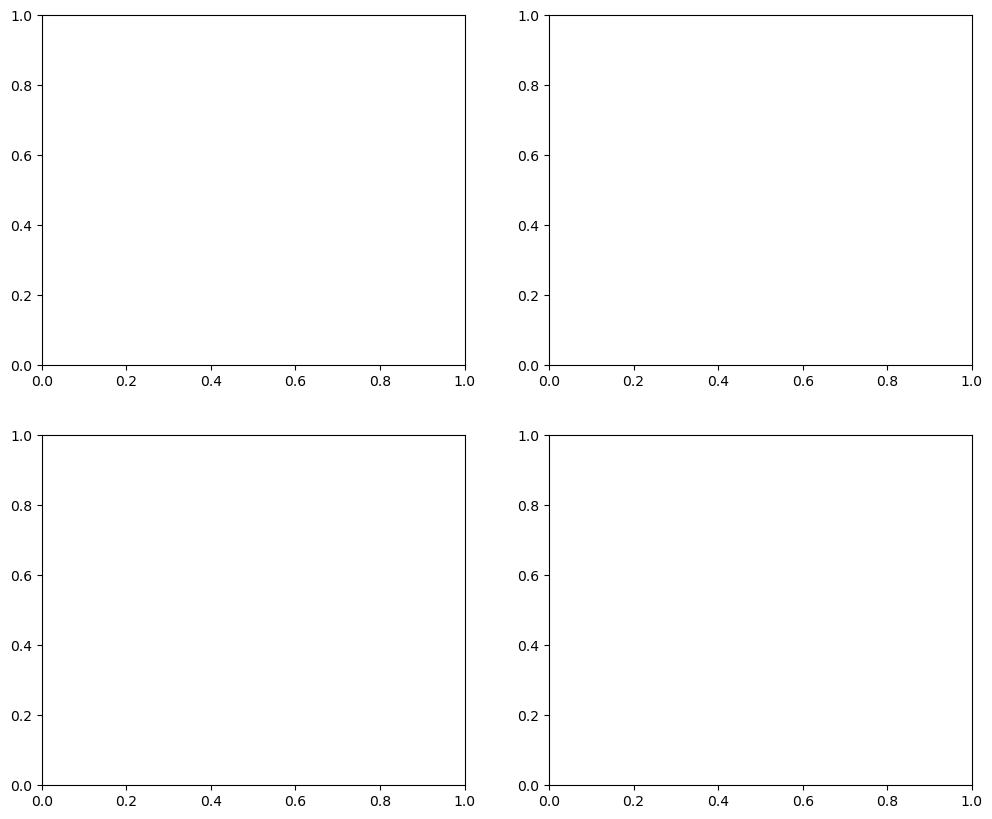

In [10]:
# Create charts
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

In [11]:
# Chart 1: Diabetes distribution
axes[0,0].pie([df['Outcome'].value_counts()[0], df['Outcome'].value_counts()[1]], 
              labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[0,0].set_title('Diabetes Distribution')


Text(0.5, 1.0, 'Diabetes Distribution')

In [12]:
# Chart 2: Glucose levels
axes[0,1].hist([non_diabetic['Glucose'], diabetic['Glucose']], 
               label=['No Diabetes', 'Diabetes'], alpha=0.7, bins=20)
axes[0,1].set_xlabel('Glucose Level')
axes[0,1].set_ylabel('Number of Patients')
axes[0,1].set_title('Glucose Levels Comparison')
axes[0,1].legend()

In [13]:
# Chart 3: Age distribution
axes[1,0].hist([non_diabetic['Age'], diabetic['Age']], 
               label=['No Diabetes', 'Diabetes'], alpha=0.7, bins=15)
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Number of Patients')
axes[1,0].set_title('Age Distribution')
axes[1,0].legend()

In [14]:
# Chart 4: BMI comparison
axes[1,1].scatter(non_diabetic['BMI'], non_diabetic['Glucose'], alpha=0.5, label='No Diabetes')
axes[1,1].scatter(diabetic['BMI'], diabetic['Glucose'], alpha=0.5, label='Diabetes')
axes[1,1].set_xlabel('BMI')
axes[1,1].set_ylabel('Glucose')
axes[1,1].set_title('BMI vs Glucose')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== SUMMARY STATISTICS ===")
print("For diabetic patients:")
print(f"- Average glucose: {diabetic['Glucose'].mean():.1f} mg/dL")
print(f"- Average BMI: {diabetic['BMI'].mean():.1f}")
print(f"- Average age: {diabetic['Age'].mean():.1f} years")

print("\nFor non-diabetic patients:")
print(f"- Average glucose: {non_diabetic['Glucose'].mean():.1f} mg/dL")
print(f"- Average BMI: {non_diabetic['BMI'].mean():.1f}")
print(f"- Average age: {non_diabetic['Age'].mean():.1f} years")


<Figure size 640x480 with 0 Axes>


=== SUMMARY STATISTICS ===
For diabetic patients:
- Average glucose: 141.3 mg/dL
- Average BMI: 35.1
- Average age: 37.1 years

For non-diabetic patients:
- Average glucose: 110.0 mg/dL
- Average BMI: 30.3
- Average age: 31.2 years


In [15]:
# Clinical insights
print("\n=== CLINICAL INSIGHTS ===")
print("1. Glucose level is the strongest diabetes predictor")
print("2. Higher BMI increases diabetes risk")
print("3. Age is correlated with diabetes prevalence")
print("4. Regular glucose monitoring is crucial for at-risk groups")


=== CLINICAL INSIGHTS ===
1. Glucose level is the strongest diabetes predictor
2. Higher BMI increases diabetes risk
3. Age is correlated with diabetes prevalence
4. Regular glucose monitoring is crucial for at-risk groups
